# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tsplib95

%matplotlib inline

## Input data

In [50]:
# BERLIN52

berlin52n = 52
print('Problem size: %d' % berlin52n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(berlin52n, 2)

A = np.empty((berlin52n, berlin52n))
for i in range(berlin52n):
    for j in range(berlin52n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


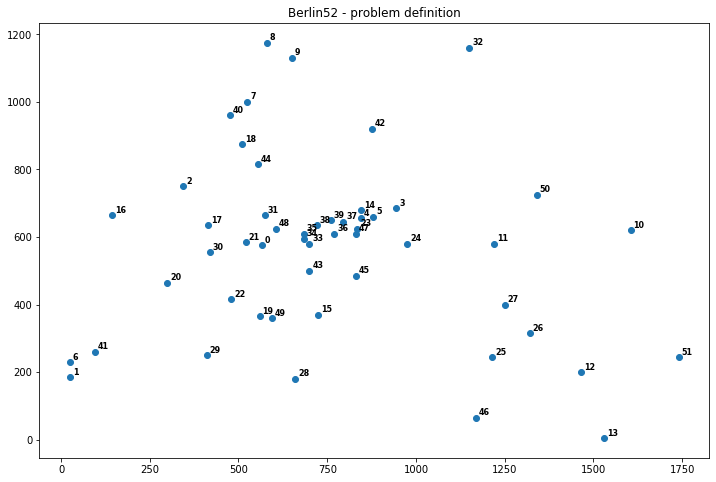

In [51]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(berlin52n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

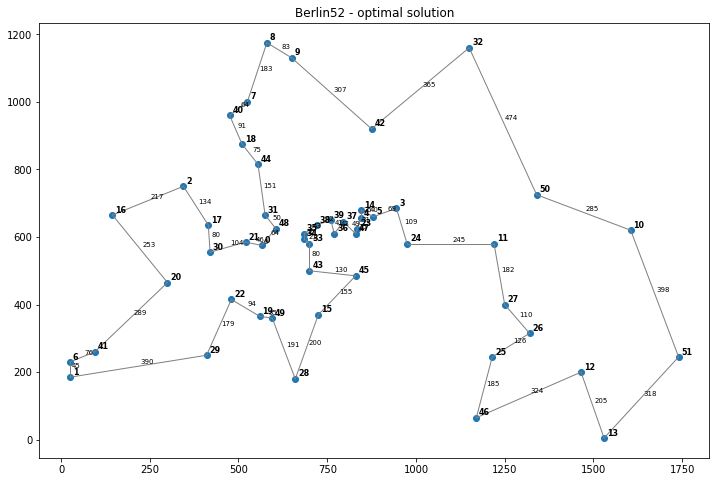

In [52]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(berlin52n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [53]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(berlin52n):
        s += A[p[i-1], p[i]]
    return s

In [54]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [55]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, berlin52n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(berlin52n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

85.86403226852417
21311.41095641222 [48 23 43 37  5 50 32 19  9 18 39 25  3  8 44  7 40  1 16 29  6 21 38 31
 26 13 22  2  0 34 41 20 42 45 15 28 12 10 27 51 46 11 24 14 49 35 36 30
 47 33  4 17]


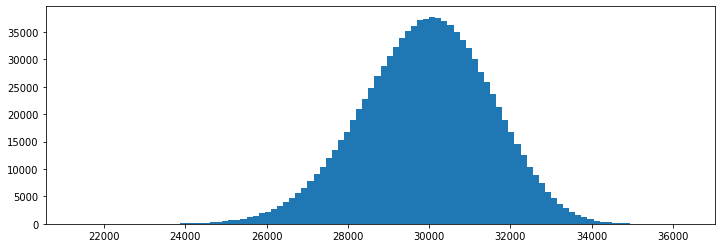

29914.815565179328 1577.6904728597397


In [56]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [57]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(berlin52n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [58]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(berlin52n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

78.77245116233826 9403.613172300897


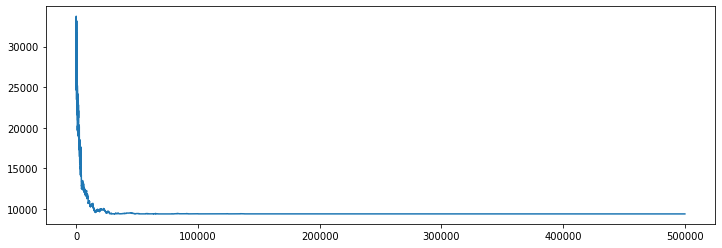

In [59]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [60]:
def ispermutation( p ):
    for i in range(p.shape[0]):
        if i not in p:
            print("indekss", i)
            return False
    return True

def PMX(ind1, ind2):
    s = ind1.shape[0]
    o1 = np.zeros(s, dtype=np.int32)
    o2 = np.zeros(s, dtype=np.int32)
    beg = np.random.randint(s - 1)
    end = np.random.randint(beg + 1, s)

    o1[beg:end] = ind2[beg:end]
    o2[beg:end] = ind1[beg:end]

    pairing = {}
    for i in range(beg, end):
        pairing[o1[i]] = o2[i]
        pairing[o2[i]] = o1[i]
    
    for i in range(0, beg):
        x = ind1[i]
        if x in o2[beg:end]:
            o2[i] = pairing[x]
        else:
            o2[i] = x

        y = ind2[i]
        if y in o1[beg:end]:
            o1[i] = pairing[y]
        else:
            o1[i] = y

    for i in range(end, s):
        x = ind1[i]
        if x in o2[beg:end]:
            o2[i] = pairing[x]
        else:
            o2[i] = x

        y = ind2[i]
        if y in o1[beg:end]:
            o1[i] = pairing[y]
        else:
            o1[i] = y

    if not ispermutation(o1) or not ispermutation(o2):
        print( "beg, end:\n", beg, end )
        print( "ind1, ind2:\n", ind1, ind2 )
        print( "ind1[b:e], ind2[b:e]:\n", ind1[beg:end], ind2[beg:end] )
        print( "o1, o2:\n", o1, o2 )
        print( "o1[b:e], o2[b:e]:\n", o1[beg:end], o2[beg:end] )
        return 'dupa'

    return o1, o2

In [61]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

def transposition_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    tmp = q[i]
    q[i] = q[j]
    q[j] = tmp
    return q
    

In [111]:
def SGA(n, objfunction, number_of_iterations=250):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] =  objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] =  objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

  0     0.29733396 25466.48809853 28351.46549031 29503.75850716 855.21860494
  1     0.53438020 24850.83283019 27255.86932279 28218.91768057 718.28961782
  2     0.87238932 24850.83283019 26381.15782527 27137.85493160 570.15987854
  3     1.13668799 24352.88019758 25674.78834257 26328.46668959 340.45943610
  4     1.40210915 24339.58489305 25366.94843908 25578.12778412 198.09634041
  5     1.78325772 24012.34987262 25065.61126103 25368.30899928 232.69773055
  6     2.12956333 23457.90836174 24732.37251885 25056.70823501 274.39018249
  7     2.44821382 23255.56420471 24371.69457243 24737.37014163 249.87574271
  8     2.71509480 22656.37354918 24094.30443176 24347.49229810 257.53850164
  9     2.99747872 22656.37354918 23758.83618183 24012.34987262 246.80389776
 10     3.29199362 21864.81493935 23441.99696387 23786.29276663 334.68588881
 11     3.55273438 21709.55963956 22979.45487072 23419.28562250 324.65421929
 12     3.80406022 21694.29900246 22587.65752274 22870.19946684 295.51119740

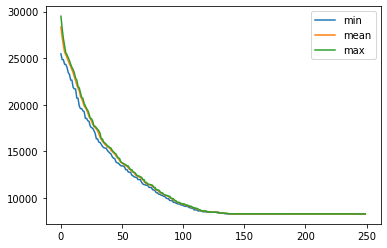

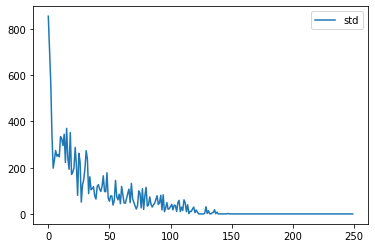

In [92]:
plotdata = SGA(berlin52n, tsp_objective_function)

plt.plot(plotdata[0], label='min')
plt.plot(plotdata[1], label='mean')
plt.plot(plotdata[2], label='max')
plt.legend()
plt.show()

plt.plot(plotdata[3], label='std')
plt.legend()
plt.show()

In [93]:
def SGAtransposition(n, objfunction):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = transposition_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

In [94]:
def makeplots(plotdata):
    plt.plot(plotdata[0], label='min')
    plt.plot(plotdata[1], label='mean')
    plt.plot(plotdata[2], label='max')
    plt.legend()
    plt.show()

    plt.plot(plotdata[3], label='std')
    plt.legend()
    plt.show()

  0     0.29390359 25798.53231343 28542.50630691 29747.47956276 901.71784611
  1     0.54451323 24850.41832632 27395.03374665 28284.22413316 623.88518479
  2     0.78324080 24850.41832632 26649.10284957 27212.07150732 435.32264981
  3     1.02857351 24850.41832632 26106.11150957 26463.55791638 294.45908357
  4     1.27828789 23401.08763978 25756.13932558 25886.33235786 230.72841298
  5     1.52414966 23355.82862753 25300.42000215 25798.53231343 497.18784080
  6     1.75904512 22685.76159940 24615.24038682 25119.48421822 580.51905452
  7     2.03859282 22179.40538001 23743.22865983 24802.68931829 528.37242423
  8     2.31528091 22179.40538001 23307.13811387 23401.08763978 231.16259395
  9     2.58517122 22139.77275279 22722.07206609 23332.92092334 307.93443552
 10     2.85239983 21470.66098214 22408.33107000 22685.76159940 186.37042643
 11     3.09934068 21470.66098214 22213.18631099 22409.70751008 146.34486427
 12     3.34912634 21142.47222403 22077.94053993 22179.40538001 207.93623812

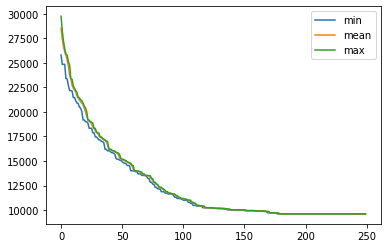

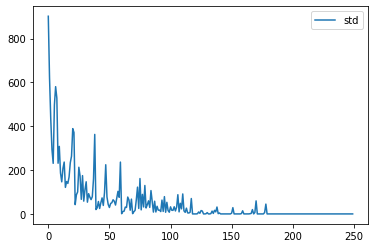

In [95]:
berlin52plot = SGAtransposition(berlin52n, tsp_objective_function)
makeplots(berlin52plot)

In [96]:
def objfunctionforE(E, n, p):
    s = 0.0
    for i in range(n):
        s += E[p[i-1], p[i]]
    return s

def openproblem(name):
    problem = tsplib95.load(name)
    probn = problem.dimension
    probedges = problem.get_edges()
    E = np.empty((probn, probn))
    for (a, b) in probedges:
        E[a - 1, b - 1] = problem.get_weight(a, b)
    return probn, E

bayg29n, bayg29E = openproblem("bayg29.tsp")
bayg29opttour = tsplib95.load("bayg29.opt.tour").tours
print(bayg29opttour)

bays29n, bays29E = openproblem("bays29.tsp")
bays29opttour = tsplib95.load("bays29.opt.tour").tours
print(bays29opttour)

kroa100n, kroa100E = openproblem("kroA100.tsp")
kroa100opttour = tsplib95.load("kroA100.opt.tour").tours
print(kroa100opttour)

kroa150n, kroa150E = openproblem("kroA150.tsp")
kroa200n, kroa200E = openproblem("kroA200.tsp")

[[1, 28, 6, 12, 9, 26, 3, 29, 5, 21, 2, 20, 10, 4, 15, 18, 14, 17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24]]
[[1, 28, 6, 12, 9, 5, 26, 29, 3, 2, 20, 10, 4, 15, 18, 17, 14, 22, 11, 19, 25, 7, 23, 27, 8, 24, 16, 13, 21]]
[[1, 47, 93, 28, 67, 58, 61, 51, 87, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82, 95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 41, 71, 14, 3, 43, 46, 29, 34, 83, 55, 7, 9, 57, 20, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 38, 24, 18, 79, 53, 88, 16, 94, 22, 70, 66, 26, 65, 4, 97, 56, 80, 31, 89, 42, 8, 92, 75, 19, 90, 49, 6, 63]]


In [99]:
def bayg29objf(p):
    return objfunctionforE( bayg29E, bayg29n, p )
bayg29plot = SGA(bayg29n, bayg29objf)


  0     0.25100970 3816.00000000 4412.05200000 4688.00000000 203.04394917
  1     0.47540736 3785.00000000 4158.29000000 4366.00000000 153.22824120
  2     0.72420907 3618.00000000 3974.05800000 4131.00000000  99.76968796
  3     0.92296219 3489.00000000 3864.84800000 3949.00000000  59.05753886
  4     1.13915205 3468.00000000 3801.22200000 3855.00000000  64.62062145
  5     1.29392385 3342.00000000 3705.54400000 3796.00000000  87.60689507
  6     1.53410363 3279.00000000 3584.25000000 3707.00000000  86.62438167
  7     1.83053398 3250.00000000 3478.53800000 3590.00000000  71.15184155
  8     2.06882906 3143.00000000 3401.89000000 3468.00000000  62.49369488
  9     2.30154586 2988.00000000 3321.82800000 3376.00000000  48.81297385
 10     2.53359365 2988.00000000 3263.67800000 3316.00000000  64.07419384
 11     2.75105548 2976.00000000 3169.27800000 3250.00000000  77.76092024
 12     2.97056413 2859.00000000 3070.64400000 3143.00000000  69.95202116
 13     3.32919478 2814.00000000 2985.

bayg29 optimal result:  1610.0


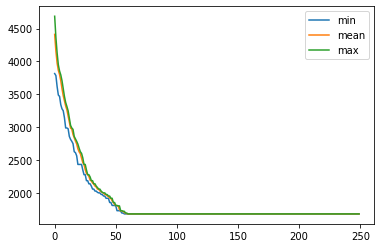

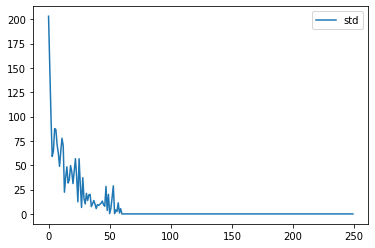

In [104]:
print("bayg29 optimal result: ", bayg29objf(np.array(bayg29opttour[0])-1) )
makeplots(bayg29plot)

In [107]:
def bays29objf(p):
    return objfunctionforE( bays29E, bays29n, p )
bays29plot = SGA(bays29n, bays29objf)

  0     0.24317932 4729.00000000 5560.15600000 5928.00000000 277.43841779
  1     0.47007656 4397.00000000 5228.16800000 5540.00000000 218.55657340
  2     0.71414208 4397.00000000 4972.59600000 5145.00000000 132.93103770
  3     0.93801904 4346.00000000 4803.97200000 4916.00000000 116.10884211
  4     1.14883137 4175.00000000 4650.79800000 4815.00000000 161.17928278
  5     1.34814048 4175.00000000 4420.43400000 4577.00000000  69.35083016
  6     1.58552098 4108.00000000 4363.99000000 4397.00000000  64.56176810
  7     1.82521176 3955.00000000 4226.41400000 4346.00000000  74.36406796
  8     2.00092530 3924.00000000 4152.61800000 4193.00000000  47.94121479
  9     2.16792178 3818.00000000 4072.80800000 4172.00000000  69.93198936
 10     2.34627151 3704.00000000 3986.66200000 4088.00000000  54.44916672
 11     2.54576373 3702.00000000 3929.34200000 3996.00000000  53.05895811
 12     2.74751735 3313.00000000 3865.84200000 3924.00000000  72.04915708
 13     2.94244576 3313.00000000 3753.

bays29 optimal result:  2020.0


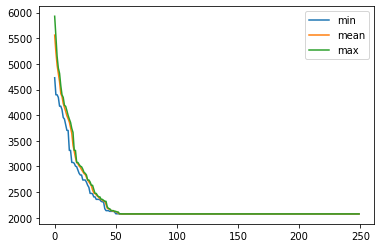

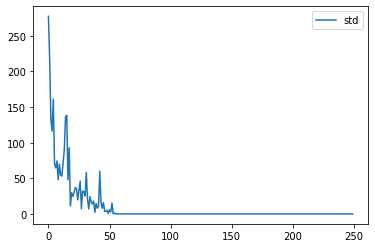

In [108]:
print("bays29 optimal result: ", bays29objf(np.array(bays29opttour[0])-1) )
makeplots(bays29plot)

In [112]:
def kroa100objf(p):
    return objfunctionforE( kroa100E, kroa100n, p )
kroa100plot = SGA(kroa100n, kroa100objf, 500)

  0     0.61084914 145928.00000000 163449.48200000 170071.00000000 4828.47385182
  1     1.15720844 145928.00000000 157075.55400000 162279.00000000 4202.11155672
  2     1.65907812 144139.00000000 151591.71000000 155832.00000000 2768.81434587
  3     2.16485715 140654.00000000 148431.32000000 151156.00000000 1630.77054474
  4     2.66761804 140654.00000000 146728.01000000 147928.00000000 1163.19031543
  5     3.17626524 140654.00000000 145258.47000000 145928.00000000 1121.03619973
  6     3.71005821 136579.00000000 143033.98800000 144884.00000000 1467.26519071
  7     4.22041678 136020.00000000 141165.16400000 143077.00000000 1072.00591841
  8     4.83643770 135850.00000000 140152.91800000 140654.00000000 1011.67133560
  9     5.58925986 134069.00000000 137919.40000000 139767.00000000 1192.03820073
 10     6.25910759 131852.00000000 136481.00600000 137833.00000000 736.64273699
 11     6.91691971 131852.00000000 135710.34800000 136540.00000000 787.08936907
 12     7.51065373 130073.0000

kroa100 optimal result:  21282.0


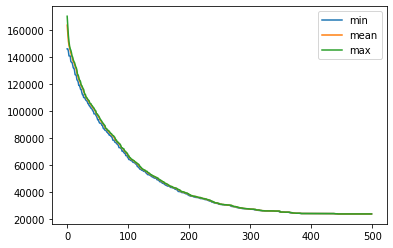

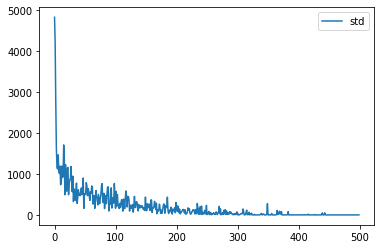

In [113]:
print("kroa100 optimal result: ", kroa100objf(np.array(kroa100opttour[0])-1) )
makeplots(kroa100plot)

In [118]:
def kroa150objf(p):
    return objfunctionforE( kroa150E, kroa150n, p )
kroa150plot = SGA(kroa150n, kroa150objf, 1000)

  0     0.94359422 231706.00000000 247791.96200000 255713.00000000 5984.65690684
  1     1.91610909 229089.00000000 240304.56600000 246126.00000000 3788.20548356
  2     2.82283998 227191.00000000 235774.17200000 238927.00000000 2435.20754483
  3     3.82724738 227191.00000000 232835.35200000 235098.00000000 1258.48685496
  4     4.97851300 225634.00000000 231402.50800000 232539.00000000 1245.87360111
  5     6.23335314 224656.00000000 229550.87000000 231446.00000000 1562.01778514
  6     7.30289841 220139.00000000 227603.74000000 229089.00000000 1213.84886226
  7     8.37777734 219214.00000000 226088.46000000 227276.00000000 1444.07034053
  8     9.30335927 216570.00000000 223959.64800000 225634.00000000 1835.12668339
  9    10.18202615 215319.00000000 221170.56600000 223330.00000000 1550.94509434
 10    11.19019771 213255.00000000 219494.99800000 220334.00000000 1152.56151506
 11    12.05726838 212667.00000000 217524.09600000 219214.00000000 1329.18210445
 12    13.06703544 211935.00

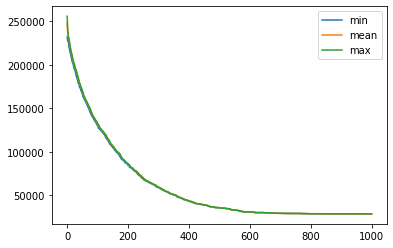

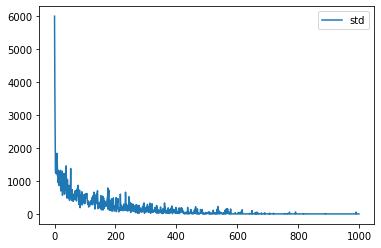

In [119]:
#print("kroa150 optimal result: ", kroa150objf(np.array(kroa150opttour[0])-1) )
makeplots(kroa150plot)

In [120]:
def kroa200objf(p):
    return objfunctionforE( kroa200E, kroa200n, p )
kroa200plot = SGA(kroa200n, kroa200objf, 1500)

  0     1.57106090 304861.00000000 329402.83800000 338034.00000000 6679.41031258
  1     2.86485505 302436.00000000 320428.88400000 327425.00000000 5460.76617468
  2     3.95945382 301094.00000000 313274.72800000 319815.00000000 4975.53332478
  3     5.05223727 300331.00000000 307483.29600000 310786.00000000 2706.01555731
  4     6.14732146 298568.00000000 304120.14000000 305127.00000000 1229.40069481
  5     7.21629357 295458.00000000 301980.53400000 303709.00000000 895.21025734
  6     8.37680888 294553.00000000 300884.75000000 302056.00000000 1211.61839847
  7     9.56383085 293037.00000000 299115.61200000 300906.00000000 1781.30537569
  8    10.62539172 290633.00000000 296569.28800000 298740.00000000 1418.77969011
  9    11.63038325 289957.00000000 294937.42400000 295759.00000000 941.07113877
 10    12.62405276 288724.00000000 293458.49600000 295040.00000000 1340.63646750
 11    13.63149452 286155.00000000 291779.59200000 293058.00000000 1118.78174705
 12    14.61810541 285771.0000

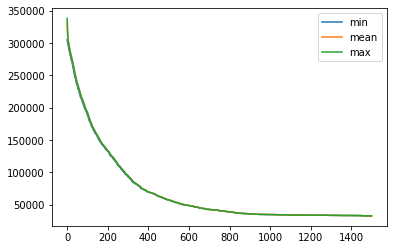

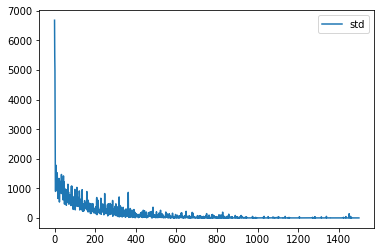

In [121]:
makeplots(kroa200plot)

In [124]:
def OX(p1, p2):
    s = p1.shape[0]
    o1 = np.zeros(s, dtype=np.int32)
    o2 = np.zeros(s, dtype=np.int32)
    beg = np.random.randint(s - 1)
    end = np.random.randint(beg + 1, s)

    beg = 3
    end = 7

    o1[beg:end] = p1[beg:end]
    o2[beg:end] = p2[beg:end]

    l1 = []
    l2 = []
    for i in range(end, s):
        if p2[i] not in o1[beg:end]:
            l1.append(p2[i])
        if p1[i] not in o2[beg:end]:
            l2.append(p1[i])

    for i in range(0, end):
        if p2[i] not in o1[beg:end]:
            l1.append(p2[i])
        if p1[i] not in o2[beg:end]:
            l2.append(p1[i])

    #print( "l1: ", l1, "\nl2: ", l2)

    for i in range(end, s):
        o1[i] = l1[i - end]
        o2[i] = l2[i - end]
    for i in range(0, beg):
        o1[i] = l1[i + (s - end)]
        o2[i] = l2[i + (s - end)]

    #print( "o1: ", o1, "\no2: ", o2 )
    return o1, o2

def SGAox(n, objfunction, number_of_iterations=250):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] =  objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = OX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] =  objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

  0     0.59292316 140116.00000000 163217.81600000 169440.00000000 5063.01214517
  1     1.01825595 140116.00000000 157005.73000000 162404.00000000 4607.35338227
  2     1.48661470 138540.00000000 151075.76000000 156779.00000000 4251.97815686
  3     1.91195297 136307.00000000 146252.07000000 150530.00000000 2955.30915897
  4     2.33033633 133070.00000000 142933.82000000 145760.00000000 2095.71974357
  5     2.71413612 130214.00000000 140165.21600000 142804.00000000 2277.87875651
  6     3.11420107 128299.00000000 136853.29400000 140116.00000000 2624.17863637
  7     3.49048066 124312.00000000 133066.13000000 136171.00000000 2162.94347524
  8     3.88785791 121255.00000000 130241.43600000 132525.00000000 1851.66697057
  9     4.25395012 120917.00000000 127662.52800000 130063.00000000 1914.34006938
 10     4.67375827 118175.00000000 125133.15200000 127443.00000000 1937.40866647
 11     5.06747222 114458.00000000 122525.20600000 124904.00000000 1782.09361919
 12     5.46469951 114458.00

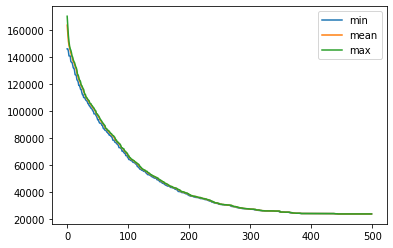

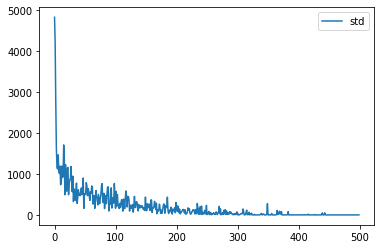

In [125]:
kroa100plotox = SGAox(kroa100n, kroa100objf, 500)
print("kroa100 optimal result: ", kroa100objf(np.array(kroa100opttour[0])-1) )
print("kroa100 pmx result: ", kroa100plot[0,-1])
print("kroa100 ox result: ", kroa100plotox[0, -1])
makeplots(kroa100plot)